# CV Exercise 2 – Edge Detection

In this exercise, we will compare different edge detection methods on the attached *stop.jpg* image.

**Questions: (first derivative)**
1. Using OpenCV, read the image into a variable *img* as a grayscale image. Make sure that `img` has shape `(665, 1000)` and show the image with `plt.imshow`.
2. Using `cv2.filter2D(img, -1, ...)`, calculate horizontal and vertical gradient values using a [1 -1] filter. Save the resulting matrices in variables *deriv_x* and *deriv_y*. Hint: See the [OpenCV 2D Convolution documentation](https://docs.opencv.org/master/d4/d13/tutorial_py_filtering.html).
3. Display *deriv_x* and *deriv_y* as images. What do you see?
4. Repeat question 3 but using histogram equalization (`cv2.equalizeHist`) before showing the images.
5. Calculate the gradient magnitude using `deriv_x` and `deriv_y` and save the matrix of magnitudes in a variable *grad_magnitudes*.
6. Apply the three thresholds 3, 8, and 12 to the magnitudes and display each resulting binary image.

In [1]:
#1.
import cv2
img = cv2.imread('stop.jpg', cv2.IMREAD_GRAYSCALE)

In [2]:
img.shape

(665, 1000)

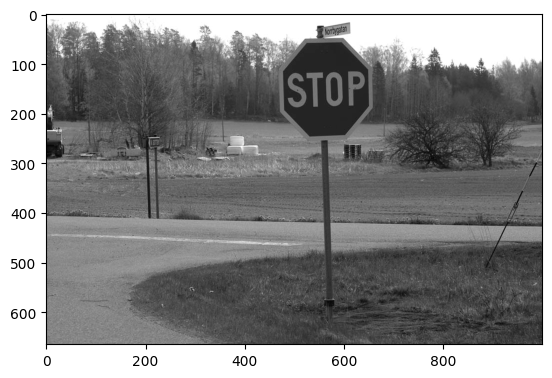

In [3]:
import matplotlib.pyplot as plt
plt.imshow(img, cmap = 'gray')

In [4]:
#2.
import numpy as np
kernel_x = np.array([1,-1])
deriv_x = cv2.filter2D(img,-1,kernel_x)

In [5]:
kernel_y = np.array([[1],[-1]]).T
deriv_y = cv2.filter2D(img,-1,kernel_y)

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  2,  4, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 6,  0,  0, ..., 10,  6, 18]], dtype=uint8)
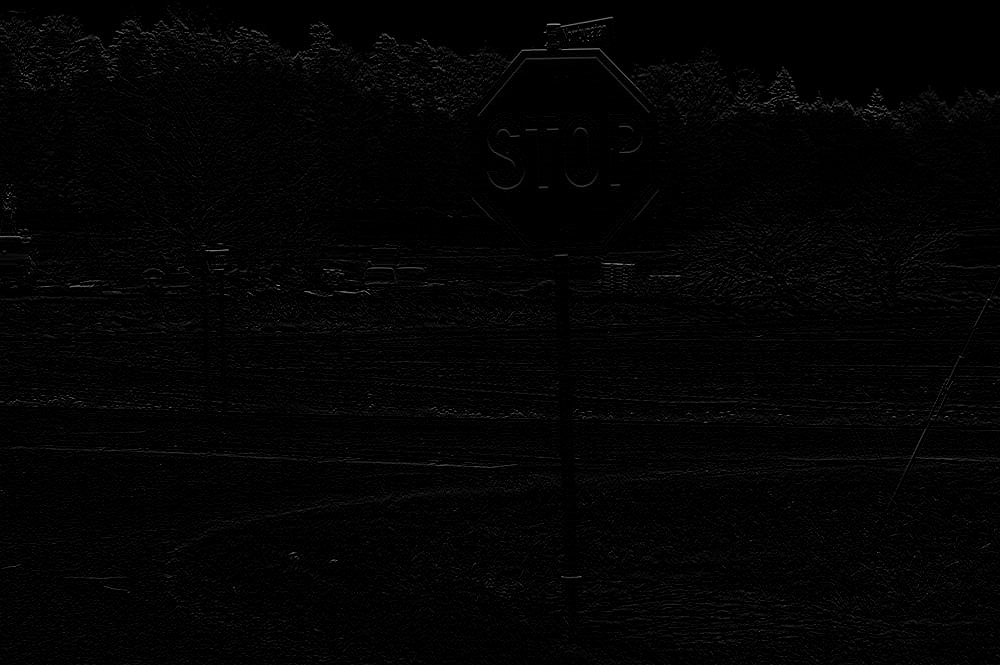

In [6]:
#3.
deriv_x

We can see the horizontale edges of the picture.

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  1,  0, ...,  0,  5,  0],
       [ 0,  2,  1, ...,  0,  1,  0],
       [14,  0,  5, ...,  0,  0,  0]], dtype=uint8)
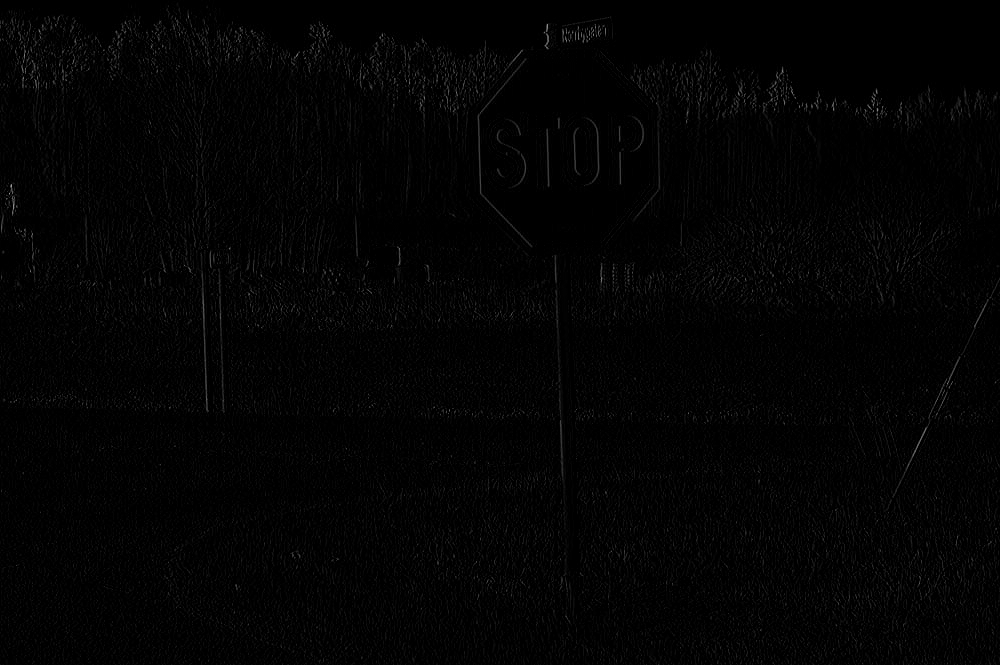

In [7]:
deriv_y

We can see the vertical edges of the picture.

In [8]:
#4.
equal_hist = cv2.equalizeHist(img)
deriv_x_hist = cv2.filter2D(equal_hist,-1,kernel_x)

In [9]:
deriv_y_hist = cv2.filter2D(equal_hist,-1,kernel_y)

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  3,  7, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [11,  0,  0, ..., 26, 15, 39]], dtype=uint8)
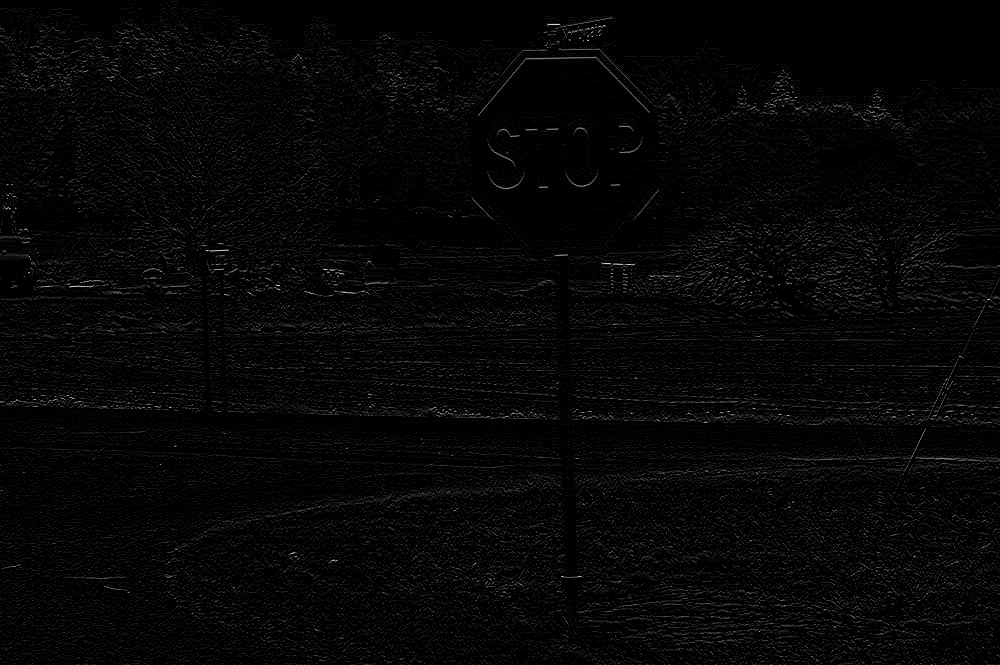

In [10]:
deriv_x_hist

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  2,  0, ...,  0, 14,  0],
       [ 0,  4,  1, ...,  0,  2,  0],
       [25,  0,  8, ...,  0,  0,  0]], dtype=uint8)
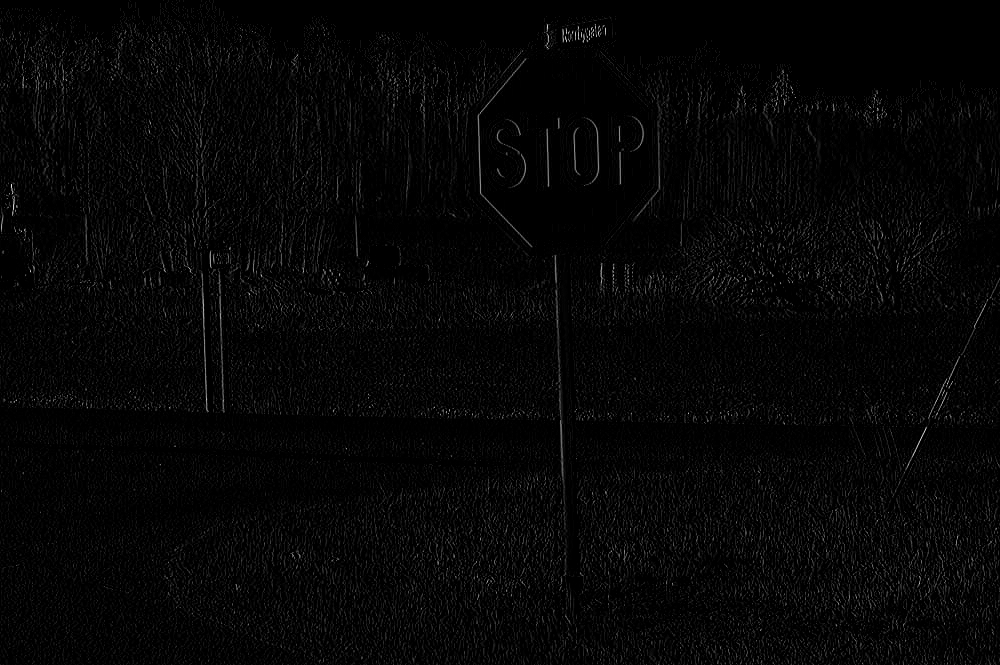

In [11]:
deriv_y_hist

In [12]:
#5.
grad_magnitudes = np.sqrt(np.square(deriv_x)+np.square(deriv_y))

In [13]:
#6.
binary_img_3 = (grad_magnitudes > 3).astype(int)*255
binary_img_8 = (grad_magnitudes > 8).astype(int)*255
binary_img_12 = (grad_magnitudes > 12).astype(int)*255

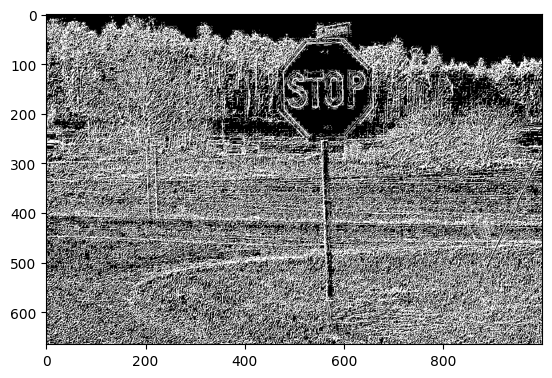

In [14]:
plt.imshow(binary_img_3, cmap = 'gray')

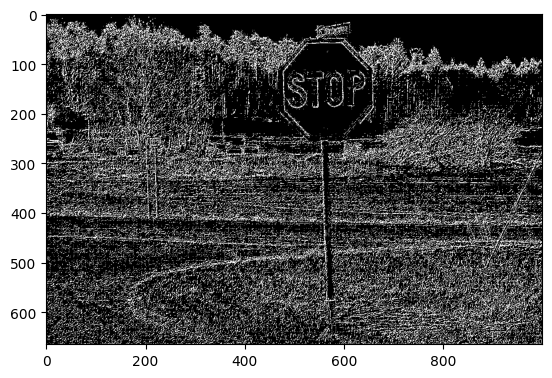

In [15]:
plt.imshow(binary_img_8, cmap = 'gray')

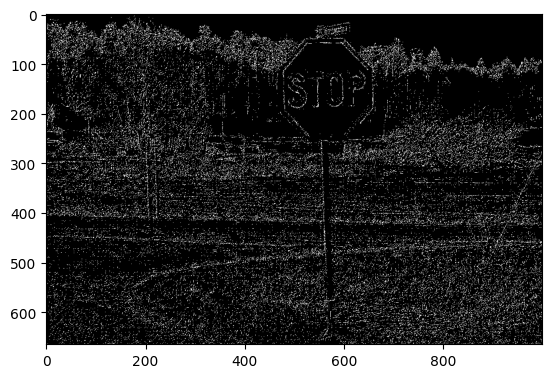

In [16]:
plt.imshow(binary_img_12, cmap = 'gray')

**Questions: (Sobel, Canny)**

7. Using `cv2.Sobel(img, cv2.CV_64F, ?, ?)`, calculate Sobel x and y derivatives of the image (`ksize` parameter not needed). Calculate the Sobel derivative magnitudes and save them in the variable `sobel_mag`. Hint: See [the OpenCV documentation](https://docs.opencv.org/master/d5/d0f/tutorial_py_gradients.html) for use of `cv2.Sobel(...)`.
8. Show `sobel_mag` as an image, using histogram equalization. Note: You may need to use `np.uint8(sobel_mag)` to convert it to the right data type first.
9. Using `cv2.GaussianBlur(..., (9,9), 0)` and `cv2.Laplacian(..., cv2.CV_64F)`, perform LoG edge detection on this image. Show the result as an image using histogram equalization. Note: For this particular image the results of LoG will not look very good.
10. Run Canny edge detection on the image, using the following threshold values: (50, 150), (50, 200), (100, 200), (150, 200), and show the results of each as an image.

In [17]:
#7.
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0)
sobely = cv2.Sobel(img,cv2.CV_64F,1,0)
sobel_mag = np.sqrt(np.square(sobelx)+np.square(sobely))


In [18]:
#8.
convert_sobel_mag = np.uint8(sobel_mag)

In [19]:
equal_sobel_hist = cv2.equalizeHist(convert_sobel_mag)

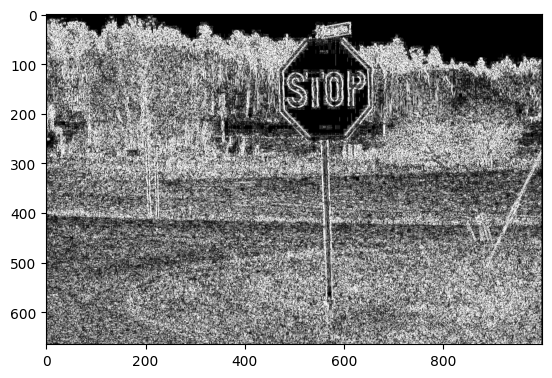

In [20]:
plt.imshow(equal_sobel_hist,cmap ='gray')

In [21]:
#9.
blur = cv2.GaussianBlur(img,(9,9),0)
laplacian = cv2.Laplacian(blur,cv2.CV_64F)
edges = np.uint8(np.absolute(laplacian))
equal_edges= cv2.equalizeHist(edges)

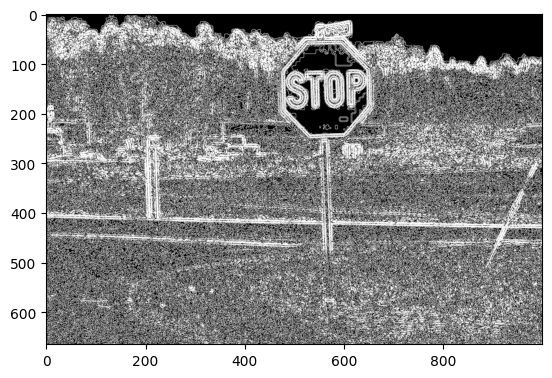

In [22]:
plt.imshow(equal_edges,cmap = 'gray')

Text(0.5, 1.0, 'Threshold = (50,150)')

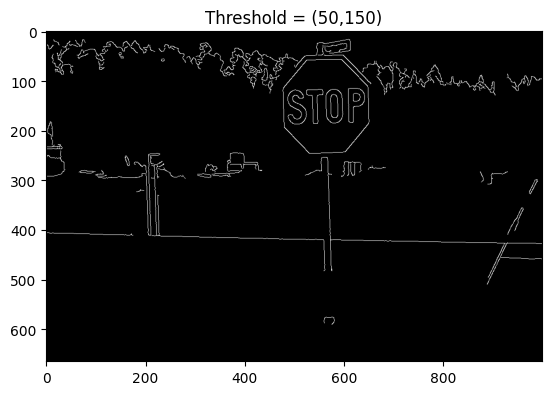

In [23]:
#10.
canny_50150 = cv2.Canny(blur,50,150)
plt.imshow(canny_50150,cmap = 'gray')
plt.title('Threshold = (50,150)')

Text(0.5, 1.0, 'Threshold = (50,200)')

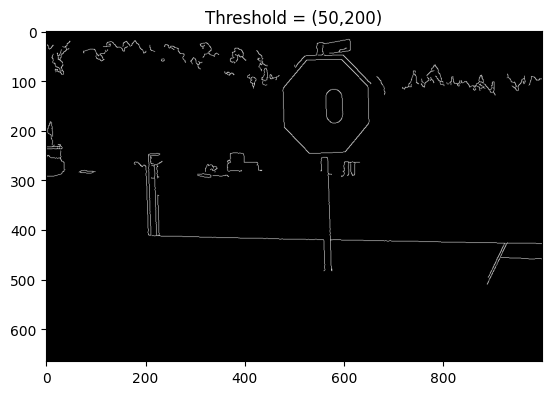

In [24]:
canny_50200 = cv2.Canny(blur,50,200)
plt.imshow(canny_50200,cmap = 'gray')
plt.title('Threshold = (50,200)')

Text(0.5, 1.0, 'Threshold = (100,200)')

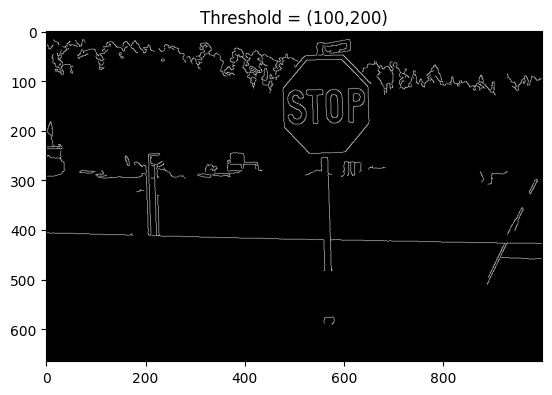

In [25]:
canny_100200 = cv2.Canny(blur,100,200)
plt.imshow(canny_50150,cmap = 'gray')
plt.title('Threshold = (100,200)')

Text(0.5, 1.0, 'Threshold = (150,200)')

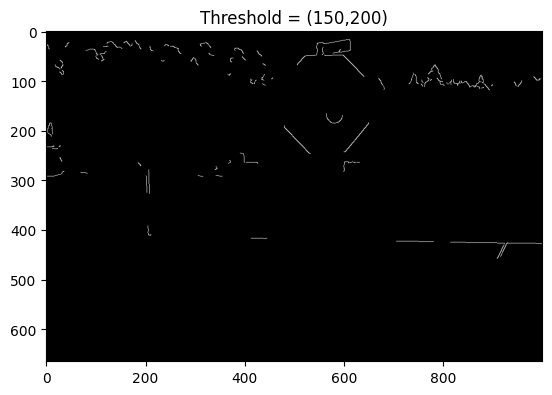

In [26]:
canny_150200 = cv2.Canny(blur,150,200)
plt.imshow(canny_150200,cmap = 'gray')
plt.title('Threshold = (150,200)')